# Example dataset: control vs late stage Alzheimers
We generate a heatmap and plot control vs late stage samples on the first two principal components. We do this for  

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from scipy.stats import zscore
from sklearn import decomposition
import re

In [43]:
meta = [
    {   # Frontal cortex
        'filename': 'Linear.reg_FC_DEP.txt',
        'row_start': 3,
        'col_end': 25
    },
    {   # Entorhinal cortex
        'filename': 'Linear.reg_EC_DEP.txt',
        'row_start': 3,
        'col_end': 23
    },
    {   # Parahippocampal cortex
        'filename': 'Linear.reg_PHC_DEP.txt',
        'row_start': 3,
        'col_end': 25
    },
    {   # Temporal cortex
        'filename': 'Linear.reg_TC_DEP.txt',
        'row_start': 3,
        'col_end': 29
    }
]

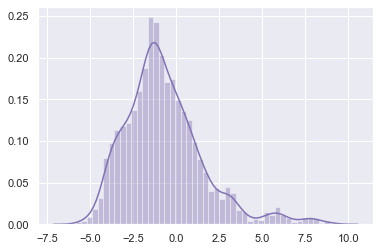

In [44]:
d = meta[0] # Frontal Cortex

data_raw = pd.read_csv(d['filename'], sep="\t", header=None)
id = data_raw.iloc[0, :d['col_end']]
x = data_raw.iloc[d['row_start']:, :d['col_end']].to_numpy().astype(np.double)

# Extract protein expression data for controls late stage
stage = np.array([re.search('(?<=.)[CVI]+(?!.)', s).group() for s in id.values])

a = stage == 'C'
b = stage == 'VI'

stage_c_vii = stage[np.logical_or(a, b)]
x_c_vii = x[:, np.logical_or(a, b)]

sns.distplot(x.ravel(), color="m")
plt.show()

## Hierarchical clustering
See *https://en.wikipedia.org/wiki/Hierarchical_clustering* for details.

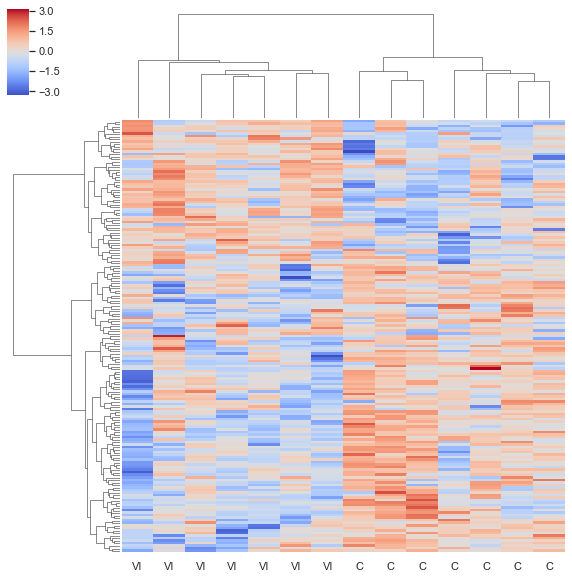

In [45]:
x_z = zscore(x_c_vii, axis=1)
df = pd.DataFrame(data = x_z, columns=stage_c_vii)
g = sns.clustermap(df, method='ward', metric='euclidean', cmap='coolwarm', yticklabels=False)

The clustering algorithm successfully groups the samples into control and late stage.

## Principal Component Analysis (PCA)
See https://en.wikipedia.org/wiki/Principal_component_analysis for details.


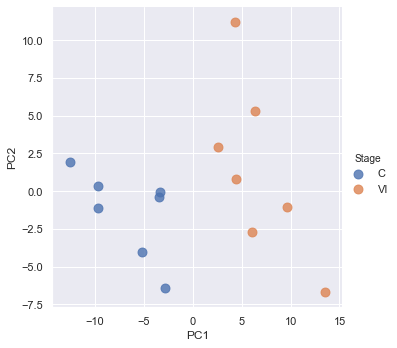

In [46]:
pca = decomposition.PCA(n_components=2)
pc_z = pca.fit_transform(x_z.transpose())
pc_df = pd.DataFrame(data = pc_z, columns = ['PC1', 'PC2'])
pc_df['Stage'] =  stage_c_vii

sns.lmplot(x="PC1", y="PC2", data=pc_df, fit_reg=False,
           hue='Stage', legend=True, scatter_kws={"s": 80})
plt.show()

We see that the first principal component completely separates the control and late stage samples.

## Conclusions
Hierarchical clustering and PCA are both 